In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch

## Importing data and refining it

In [7]:
data = pd.read_csv('dataset/train.csv')
y = data.pop('label')
X = data

In [11]:
nan_values = X.isna().any()
print("Columns with NaN values:")
print(nan_values[nan_values].index.tolist())

Columns with NaN values:
[]


In [14]:
# converting the data to tensor
X = torch.Tensor(np.array(X))
y = torch.Tensor(y)

In [140]:

def find_optimal_dim(n): #returns dimensions as a,b (a < b)
    # n is the number of graphs to be plotted
    
    #find factors
    factors = []
    for i in range(1,n+1):
        if(n % i == 0):
            factors.append(i)
    
    #now using two pointer we can find the minimum difference
    min_diff = 0

    l = len(factors)
    mid = l // 2
    pointer = mid
    while(mid != 0 or mid != l):

        val = factors[mid] * factors[pointer]

        if(val > n):
            pointer -= 1
        elif(val < n):
            pointer += 1
        elif(val == n):
            return min(factors[mid],factors[pointer]), max(factors[mid],factors[pointer])


    pass


#creating a function to print the number on a matplotlib pyplot
def show_img(X,y=-1):
    
    X = X.reshape(28,28)

    plt.imshow(X,cmap='gray')
    plt.title(y.numpy())

    pass


def show_multiple_img(X,y,range_max=1):
    range_min=0
    count = range_max - range_min
    n,m = find_optimal_dim(count)
    _, axs = plt.subplots(n, m, figsize=(8, 6))
    
    o = range_min #counter to next picture
    for i in range(n):
        for j in range(m):

            axs[i,j].imshow(X[o].reshape(28,28),cmap='gray')
            axs[i,j].set_title(y[o].numpy())
            axs[i,j].set_xticklabels([])
            axs[i,j].set_yticklabels([])  
            o += 1
    
    plt.show()  


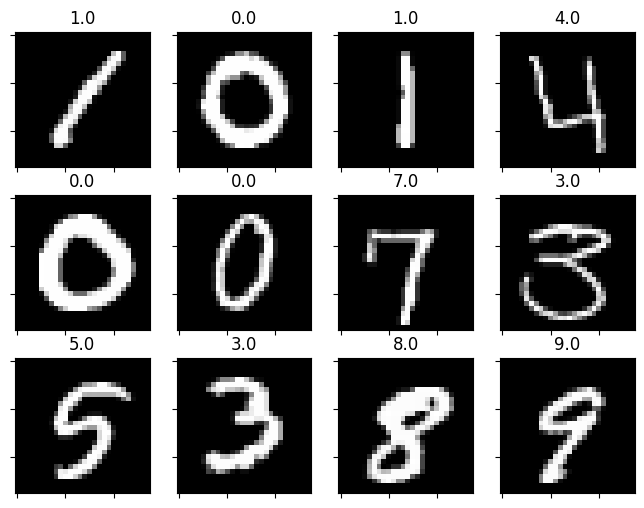

In [141]:
show_multiple_img(X,y,12)

In [135]:
# Define a custom dataset class
from torch.utils.data import Dataset, DataLoader
class mnist_dataloader(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data[index]
        target = self.targets[index]

        # Apply transformations if specified
        if self.transform:
            sample = self.transform(sample)

        return sample, target

In [137]:
# using dataloader to process data further 
mnist_data = mnist_dataloader(X,y)
custom_dataloader = DataLoader(mnist_data, batch_size=4, shuffle=True)

In [139]:
# Iterate over the data loader
for batch_idx, (inputs, targets) in enumerate(custom_dataloader):
    # Process the batch
    print("Batch", batch_idx)
    print("Inputs shape:", inputs.shape)
    print("Targets shape:", targets.shape)

## Creating a model

In [ ]:
import torch.nn as nn
class mnist_model(nn.Module):
    def __init__(self):
        super(mnist_model, self).__init__()
        
        